## Campaign for selling personal loans.

Read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from the CSV file
dfBank=pd.read_csv("C:/Users/Nageswar/AnacondaProjects/SL_Project2/Bank_Personal_Loan_Modelling-1.csv")
dfBank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
dfBank.shape

(5000, 14)

In [4]:
# Observation: The sample data has 5000 records with 14 attributes. 

In [5]:
dfBank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
# Observation:  All attributes are of numerical data. So, there is no transformation required.  

In [7]:
dfBank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [8]:
# Observation: There are no null values in the data, so need for imputation

In [9]:
dfBank.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
#Zip code is supposed to be a categorical variable, but in the data, it is represented as Int 64.  
#Now convert this data in to Categorical variable and then apply the logic

dfBank[["ZIP Code"]]=dfBank[["ZIP Code"]].astype(object) 
dfBank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code               object
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
#Now we need to convert the categorical variable "ZIP Code" data in to numerical data
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

dfBank[["ZIP Code"]]=enc.fit_transform(dfBank[["ZIP Code"]])
dfBank.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,83,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,367,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,298,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,96,4,1.0,2,0,0,0,0,0,1


In [12]:
dfBank.loc[dfBank['Experience'] <0, 'Experience'] = dfBank["Experience"].median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268CE130908>,
      dtype=object)

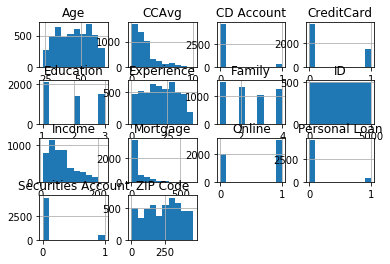

In [13]:
dfBank.hist()

Observations: 
    1. Age attribute has values that are normally  distributed
    2.Experience is normally distributed with more customer having experience starting from 8 years. 
    3.Income is right skewed. Majority of the customers have income between 45K and 55K.
    4. CCAvg is right skewed variable and average spending is between 0K to 10K 
    5. Mortgage 70% of the individuals have a mortgage of less than 40K.
    6. Experience: has negative values, suggesting to transform the data. 
    7. Zip Code is supposed to be string data, but represented as Integer data.  Calculations on this 

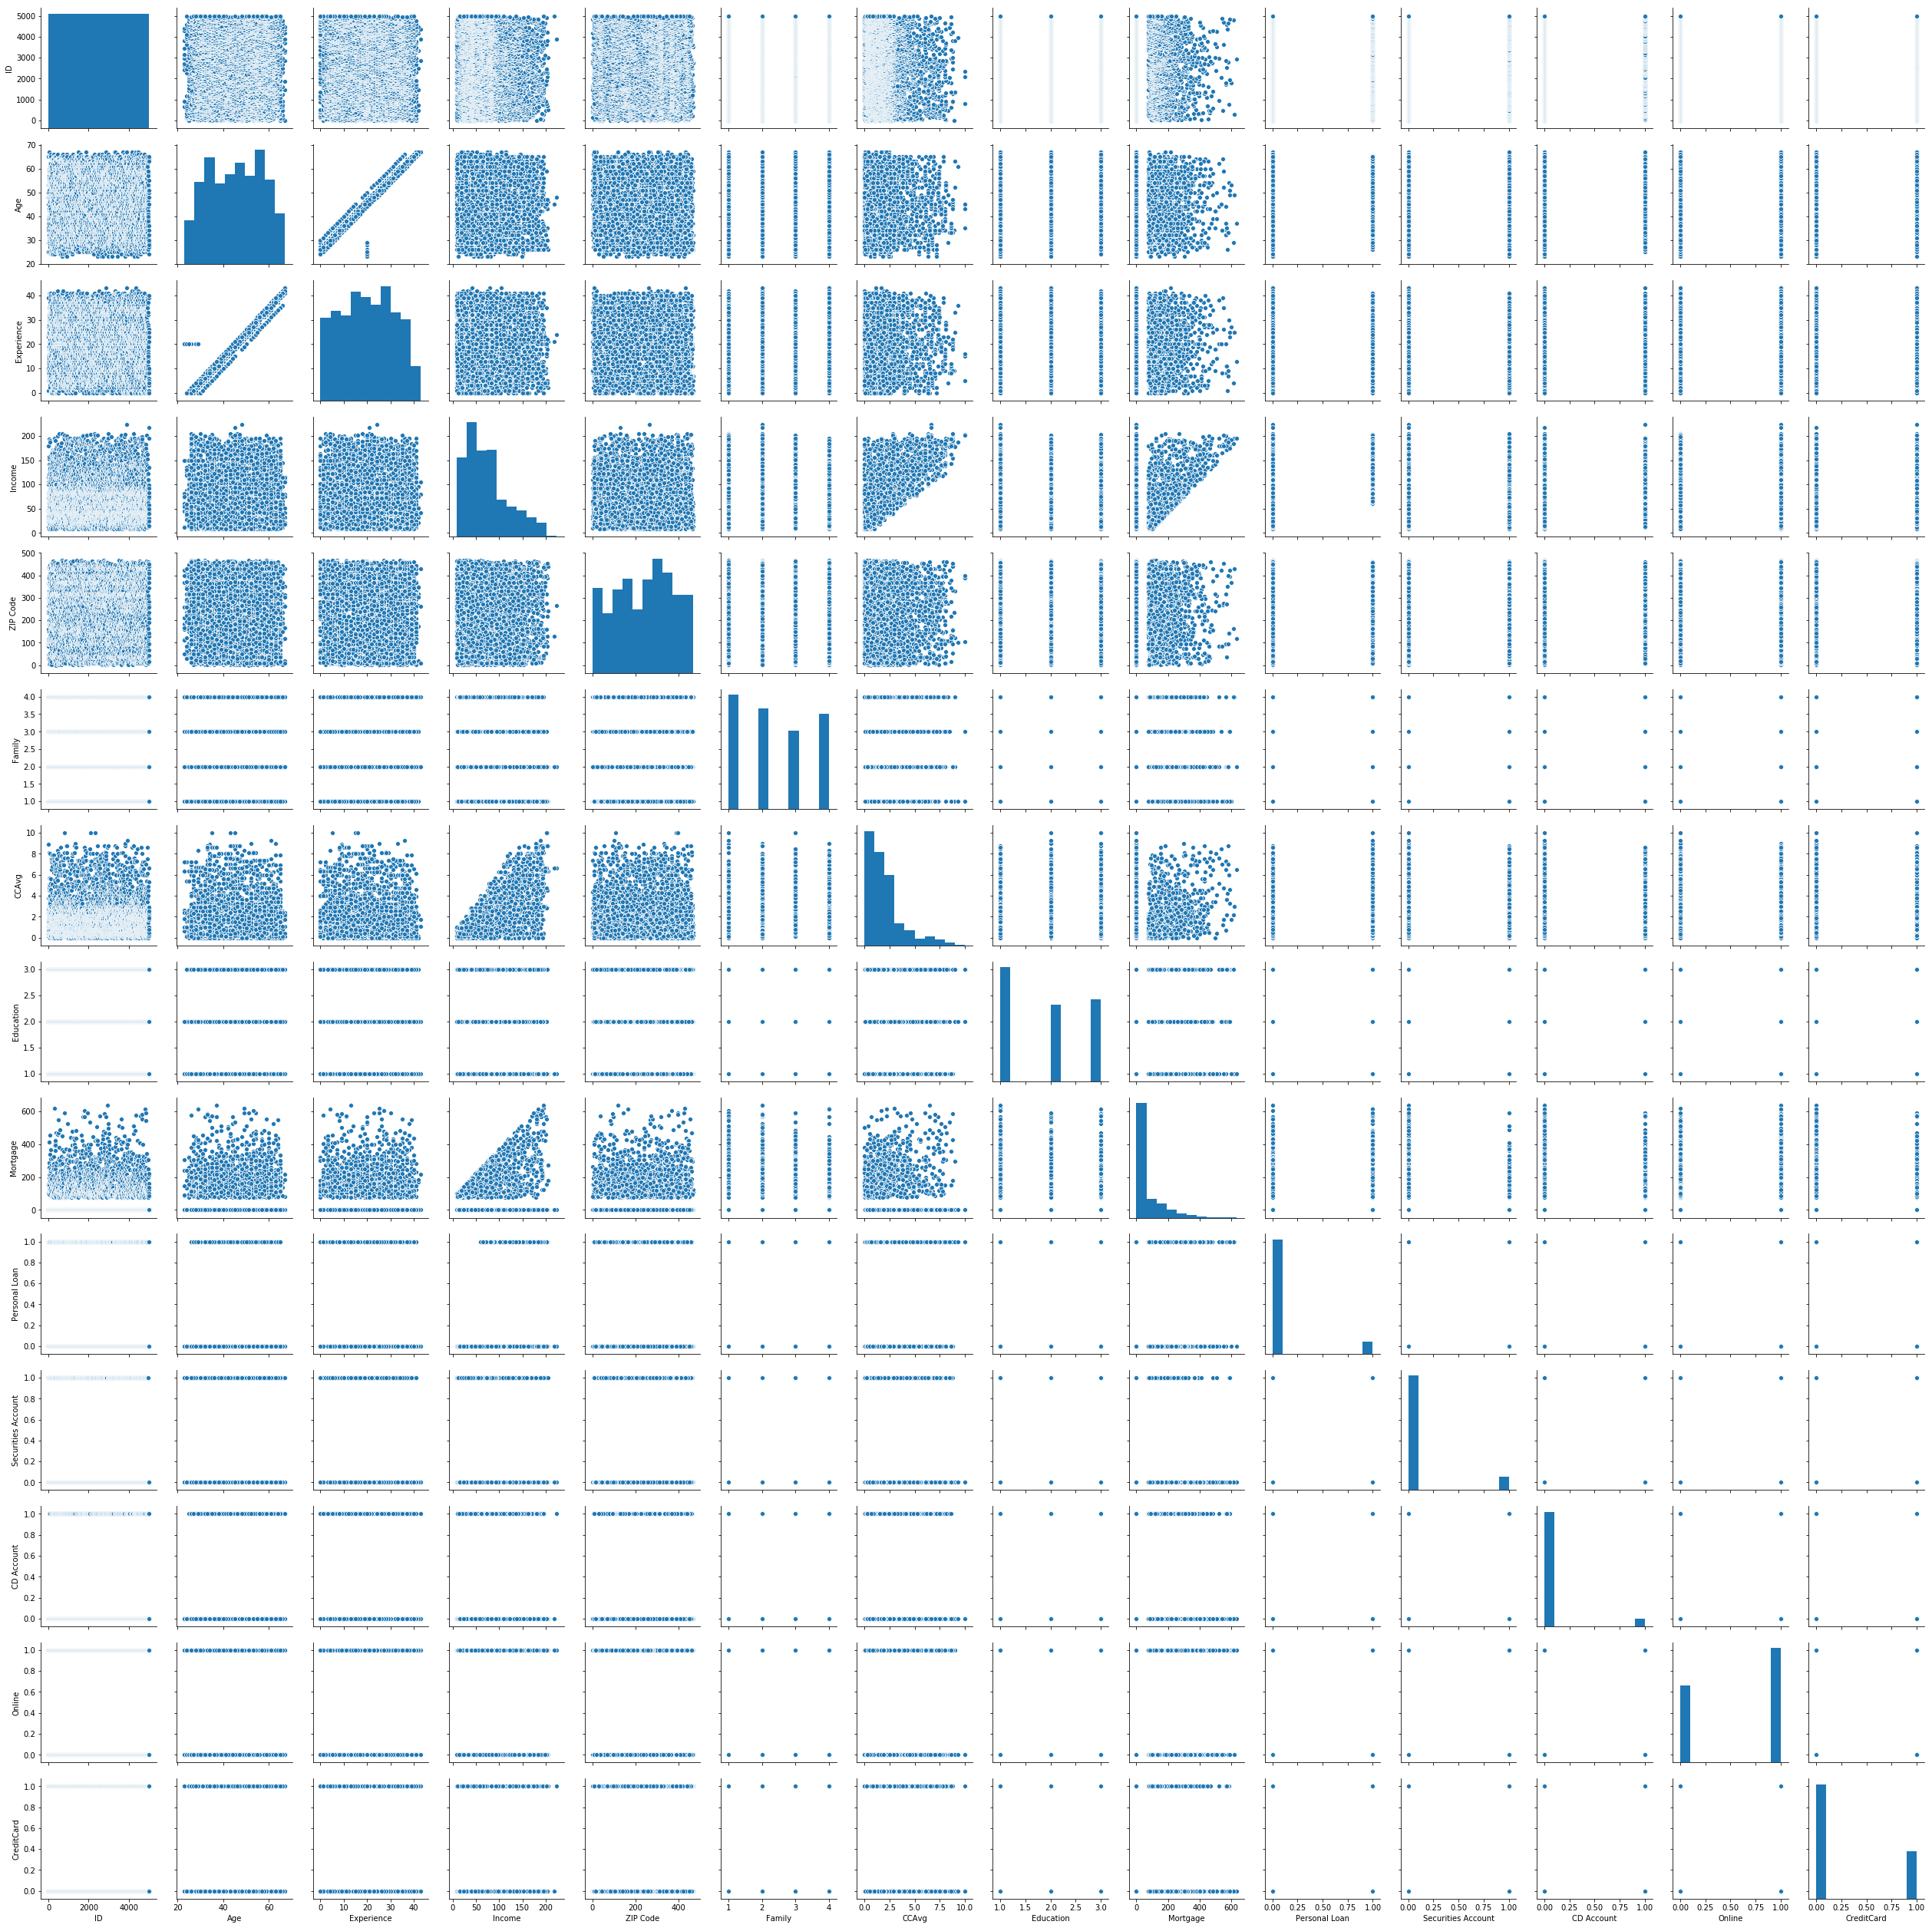

In [14]:
import seaborn as sns
sns.pairplot(dfBank)

In [15]:
dfBank["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

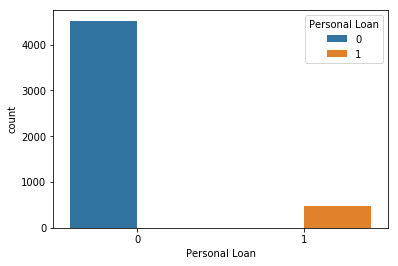

In [16]:
#Target column distribution
import seaborn as sns

sns.countplot('Personal Loan',data=dfBank,hue = 'Personal Loan')


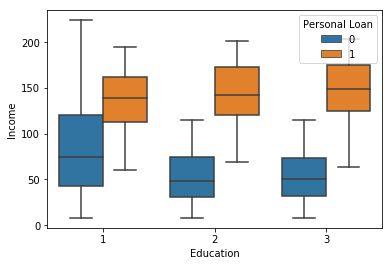

In [17]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dfBank)

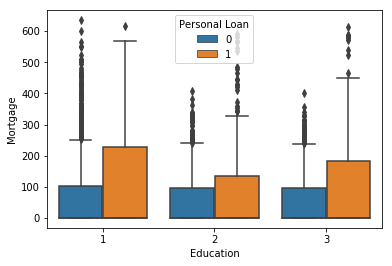

In [18]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dfBank)

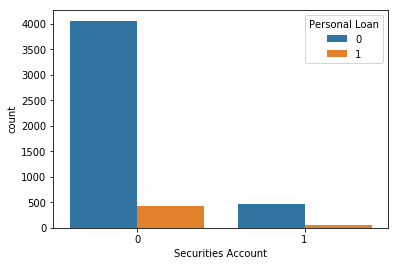

In [19]:
sns.countplot(x="Securities Account", data=dfBank,hue="Personal Loan")

Majority of customers who does not have loan have securities account

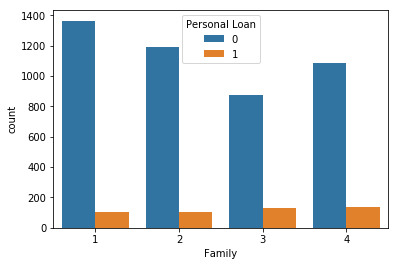

In [20]:
sns.countplot(x='Family',data=dfBank,hue='Personal Loan')

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

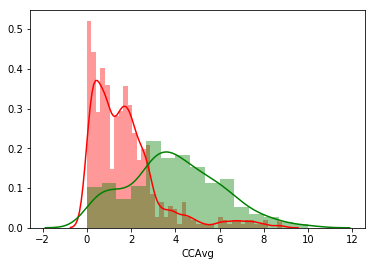

In [21]:
sns.distplot( dfBank[dfBank["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( dfBank[dfBank["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [22]:
print('Credit card spending of Non-Loan customers: ',dfBank[dfBank["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', dfBank[dfBank["Personal Loan"] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. 



Text(0, 0.5, 'Age')

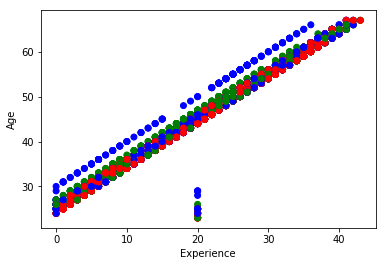

In [23]:
fig, ax = plt.subplots()
colors = {1:'red',2:'green',3:'blue'}
ax.scatter(dfBank['Experience'],dfBank['Age'],c=dfBank['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

Observation:
Experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level


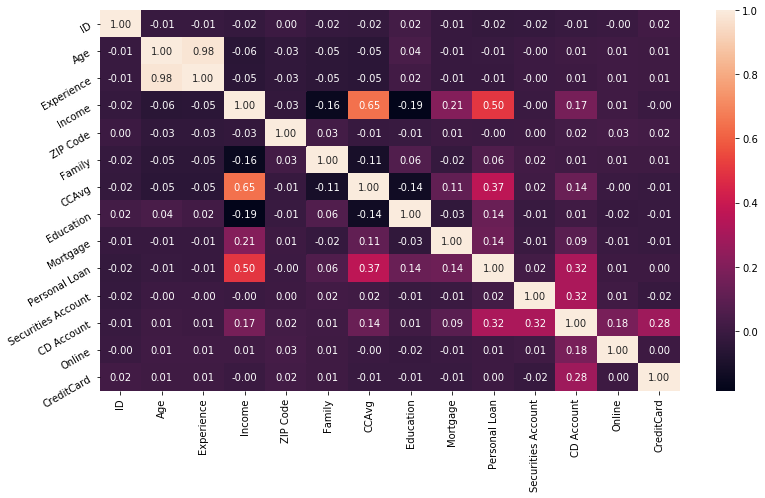

In [24]:
corr = dfBank.corr()
plt.figure(figsize=(13,7))

a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation: 
    Age and Experience is highly correlated. Income and CCAvg are moderately correlated.

In [25]:
count_no = len(dfBank[dfBank['Personal Loan']==0])
count = len(dfBank[dfBank['Personal Loan']==1])
pct = count_no/(count_no+count)
print("percentage of no loan takers is", pct*100)
pct = count/(count_no+count)
print("percentage of Loan takers is ", pct*100)

percentage of no loan takers is 90.4
percentage of Loan takers is  9.6


In [26]:
dfBank.groupby("Personal Loan").mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.378982,66.237389,239.704204,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,239.289583,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Observations
1. Average age of loan takers and rejected ones is almost same.  
2. Average Experience of loan takers is less compared to the average experience of the non-loan takers
3. Average Income of the loan takers is more than double the average of the non-loan takers. Indicating, higher chances of lon taking, when the income range is high.
4. Average no of Family members for loan takers is slightly higher than the non-loan takers.  Indicating, no of family members has an importance in loan taking, but not significantly impacting the decision
5. Average CC spending for loan takers is more than double to the non-loan takers.  Indicating, higher the credit card spending more the chances of loan taking.
6. Average Education of the Loan takers is higher than the non-loan takers.  Indicating, chances of loan taking may depend on the educaion
7. Mortage average for Loan takers is almost double to the non-loan takers average.  Indicates, higher the Mortagage, higher the chances of loan taking.
8. Securities has no impact on the decision as the averages are almost same.
9. CD account is significantly influencing the decision 
10. Online and Credit Card  variables are not highly influential

Inference
> Income, CCAvg, Mortgage, CDAccount are the major influences in the decision
> Age, Family, Experience, Education, Securities Account variables have influence in decision making, but not significant
> Online & Credit card variables have no importance in decision making


In [27]:
#Drop the non-significant columns to improve the model performance 

df_out=dfBank.drop(["ID","Experience"],axis=1)

df_out.shape

(5000, 12)

In [28]:
#Splitting the data in to training and test data

X=df_out.drop("Personal Loan",axis=1)
Y=df_out["Personal Loan"]
print (Y.shape, X.shape)

(5000,) (5000, 11)


In [29]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.7, random_state=0)
print(X_train.shape,X_test.shape)


(3500, 11) (1500, 11)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
X_train

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2858,36,158,397,2,7.80,1,114,0,0,1,1
1559,59,102,205,4,3.00,2,115,0,0,1,0
1441,58,43,367,2,1.60,3,0,0,0,1,0
2179,49,68,8,1,1.50,2,0,0,0,0,0
1390,29,80,316,4,1.80,2,0,0,0,1,1
2575,42,41,51,3,0.50,3,0,0,0,1,0
467,45,39,39,1,2.40,1,0,0,0,0,1
4448,59,40,290,3,0.90,3,0,0,0,1,0
276,30,22,25,4,0.50,3,109,0,0,1,0
1046,51,34,292,4,0.40,2,0,0,0,0,0


In [31]:
#making three sets of training data for the 3 classification models
#for Navie Bayes classification
X_NB_train=X_train.copy(deep=False)
X_NB_test=X_test.copy(deep=False)
y_NB_train=y_train.copy(deep=False)
y_NB_test=y_test.copy(deep=False)

#for KNN  classification
X_KN_train=X_train.copy(deep=False)
X_KN_test=X_test.copy(deep=False)
y_KN_train=y_train.copy(deep=False)
y_KN_test=y_test.copy(deep=False)


#for Logistic classification
X_LG_train=X_train.copy(deep=False)
X_LG_test=X_test.copy(deep=False)
y_LG_train=y_train.copy(deep=False)
y_LG_test=y_test.copy(deep=False)

# LOGISTIC 

In [32]:
import statsmodels.formula.api as sm
import statsmodels.api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr=LogisticRegression()
clf=lgr.fit(X_LG_train,y_LG_train)
predict=clf.predict(X_LG_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
#Accuracy Score

accuracy_score(y_LG_train,clf.predict(X_LG_train))

0.948

In [34]:
accuracy_score(y_LG_test,clf.predict(X_LG_test))

0.9513333333333334

In [35]:
clf.intercept_

array([-9.12856556])

In [36]:
clf.coef_

array([[-1.70496037e-02,  4.17175802e-02, -8.31441366e-04,
         4.03315454e-01,  1.30943324e-01,  1.29724074e+00,
         7.04618758e-04, -6.10632087e-01,  3.16593076e+00,
        -7.52671471e-01, -9.33829966e-01]])

In [37]:
df_new=pd.DataFrame(clf.coef_,columns=X.columns) 
df_new.transpose()

,0
Age,-0.017050
Income,0.041718
ZIP Code,-0.000831
Family,0.403315
CCAvg,0.130943
Education,1.297241
Mortgage,0.000705
Securities Account,-0.610632
CD Account,3.165931
Online,-0.752671


In [38]:
#  CD Account has the highest impact on the dependent variable Personal Loan

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_LG_test, predict)
print(confusion_matrix)

[[1355   17]
 [  56   72]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.81      0.56      0.66       128

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.78      0.82      1500
weighted avg       0.95      0.95      0.95      1500



Observation: 95% accuracy..

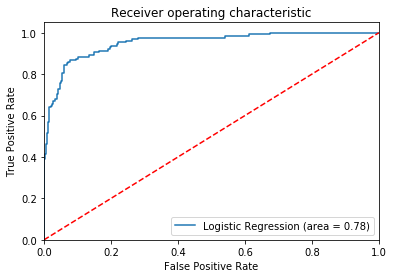

In [41]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_LG_test, lgr.predict(X_LG_test))
fpr, tpr, thresholds = roc_curve(y_LG_test, lgr.predict_proba(X_LG_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_KN_train, y_KN_train)    
predicted = knn.predict(X_KN_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_KN_test, predicted)
print(acc)

0.9133333333333333


In [44]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_KN_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1372
           1       0.48      0.22      0.30       128

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.71      0.60      0.63      1500
weighted avg       0.89      0.91      0.90      1500



In [45]:
# Print out confusion matrix
cmat = confusion_matrix(y_KN_test, predicted)

print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 1342
FP - False Positive 30
FN - False Negative 100
TP - True Positive 28
Accuracy Rate: 0.9133333333333333
Misclassification Rate: 0.08666666666666667


In [46]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_KN_train, y_KN_train)
    pred_i = knn.predict(X_KN_test)
    error_rate.append(np.mean(pred_i != y_KN_test))

Text(0, 0.5, 'Error Rate')

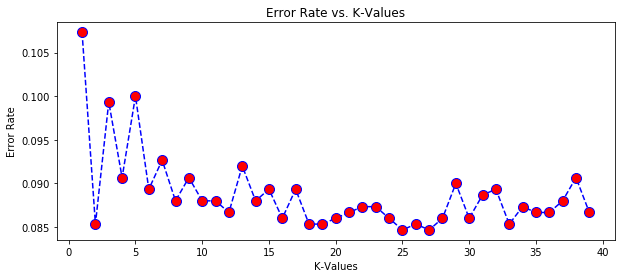

In [47]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [48]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_KN_train, y_KN_train)
pred = knn.predict(X_KN_test)

In [49]:
# Print out classification report and confusion matrix
print(classification_report(y_KN_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1372
           1       0.48      0.22      0.30       128

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.71      0.60      0.63      1500
weighted avg       0.89      0.91      0.90      1500



In [50]:
# Accuracy of the model is 91%

In [51]:
# Print out confusion matrix
cmat = confusion_matrix(y_KN_test, predicted)

print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 1342
FP - False Positive 30
FN - False Negative 100
TP - True Positive 28
Accuracy Rate: 0.9133333333333333
Misclassification Rate: 0.08666666666666667


# Naive Bayes

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Since our data has continuous and boolean data, we should go for the Gaussian 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [54]:
df_out = dfBank.drop(["Personal Loan"], axis = 1)
X_train = df_out
y_train=dfBank["Personal Loan"]
y_train.shape,X_train.shape

((5000,), (5000, 13))

In [55]:
y_train.isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4970    False
4971    False
4972    False
4973    False
4974    False
4975    False
4976    False
4977    False
4978    False
4979    False
4980    False
4981    False
4982    False
4983    False
4984    False
4985    False
4986    False
4987    False
4988    False
4989    False
4990    False
4991    False
4992    False
4993    False
4994    False
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Personal Loan, Length: 5000, dtype: bool

In [56]:
GNB = clf.fit(X_train, y_train)

In [57]:
## Get the probability
dfBank['prob'] = pd.DataFrame(GNB.predict_proba(X_train))[1]

In [58]:
dfBank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,prob
0,1,25,1.0,49,83,4,1.6,1,0,0,1,0,0,0,2.031415e-04
1,2,45,19.0,34,34,3,1.5,1,0,0,1,0,0,0,3.504900e-05
2,3,39,15.0,11,367,1,1.0,1,0,0,0,0,0,0,8.853800e-07
3,4,35,9.0,100,298,1,2.7,2,0,0,0,0,0,0,8.243590e-03
4,5,35,8.0,45,96,4,1.0,2,0,0,0,0,0,1,9.427755e-05


In [59]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(dfBank["Personal Loan"],dfBank["prob"])
auc

0.9279286504424779

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [61]:
# Print out classification report and confusion matrix
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
from sklearn.metrics import confusion_matrix
prediction = nb.predict(X_test)
print(confusion_matrix(y_test, prediction))

[[975 368]
 [ 73  84]]


975+84 are Positive and 73+368 are Negaive

In [63]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, prediction)

print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 975
FP - False Positive 368
FN - False Negative 73
TP - True Positive 84
Accuracy Rate: 0.706
Misclassification Rate: 0.294


So the accuracy rate is 70.6 % only

In [64]:
# Model Comparision

In [65]:
X=dfBank.drop(['Personal Loan','Experience','ID'],axis=1)
y=dfBank.pop('Personal Loan')

KNN: 0.899200 (0.009304)
NB: 0.884400 (0.009457)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.949600 (0.005643)


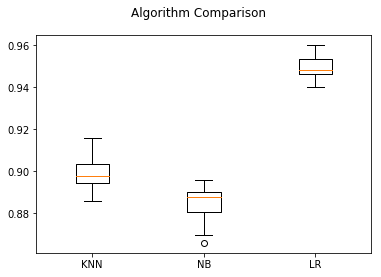

In [66]:
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion: 
    From the above graph , it seems like Logistic Regression has the highest accuracy and we can choose that as our final model